# Understanding the error of Multispecies Biodiversity Indicators: A

simulated example

Rob Boyd  
2025-05-20

# Introduction

A common benchmark for monitoring progress towards species abundance
targets is the Multispecies Biodiversity Indicator (MSI). MSIs have been
defined in various ways, but to us the term is best described as an
estimate of the ‘average’ rate of change in abundance, relative to some
reference time, across a predefined set of species and geographic area.
A prominent example, which was recently reinstated as a ‘component’
indicator for monitoring progress towards the GBF, is the Living Planet
Index. According to its website, the LPI measures the “the average rate
of change in … population sizes of native \[vertebrate\] species”
globally. Other examples include the EU’s grassland butterfly index and
England’s ‘all species’ index, which will be used to measure progress
towards the respective governments’ legal commitments.

MSIs have nominal spatial and taxonomic extents that should, in theory,
align with the relevant species abundance target. Spatial extents might
be defined in terms of, say, a country or administrative unit (or even
globally in the case of the LPI), and they can be divided conceptually
into areal units or ‘sites’ (e.g. grid squares on a map). Taxonomic
extents are usually defined in terms of a set of species. In statistical
parlance, the complete set of sites and species to which an MSI
nominally pertains is known as the target population or simply the
population (not to be confused with the ecological concept of a
population).

Given the limited spatial and taxonomic coverage of biodiversity data,
it is likely that the set of sites and species for which abundance data
are available will differ from the population. It follows that the MSI
obtained using the data in hand is likely to differ from the one that
would have been obtained had all species and locations in the population
been sampled. To use more statistical language, the sample-based MSI is
known as the estimator, and the population MSI is the target parameter
or estimand. Since it is the estimand that is of interest, the hope is
that the (proportional) difference between it and the estimator—the
estimation error—is small.

The ratio of the estimator to the estimand gives the proportional, or
relative, estimation error. Colleagues and I decomposed the relative
error of MSIs algebraically into a cross-species component reflecting
the impact of non-sampled species and a within-species component
reflecting the impact of non-sampled sites. Define the following
quantities:

-   ( {w}\_t ): the observed MSI at time ( t ) given sampled species and
    sites.
-   ( {W}\_t ): the true MSI at time ( t ) given all species and sites
    in the target population.
-   ( s\_{1,t}^J ): the set of species included in the sample at time (
    t ); ( n\_{1,t}^J ) is its size.
-   ( N\_{1,t}^J ): the total number of species in the population at
    time ( t ).
-   ( W\_{jt} ): the population growth rate in mean occupancy ( j ) at
    time ( t ) relative to time ( 1 ).
-   ( {Y}\_{jt} ): the true mean occupancy of species ( j ) across all
    sites in the population at time ( t ).
-   ( {y}\_{jt} ): the sample mean occupancy of species ( j ) across
    sampled sites at time ( t ).

Then, the full decomposition is

$$
\ln\left( \frac{\bar{w}_t}{\bar{W}_t} \right) =
\underbrace{
\left(
\frac{1}{n_{1,t}^J} \sum_{j \in s_{1,t}^J} \ln W_{jt}
-
\frac{1}{N_{1,t}^J} \sum_{j=1}^{N_{1,t}^J} \ln W_{jt}
\right)
}_{\substack{\text{cross-species} \\\\ \text{component}}}
+
\underbrace{
\left(
\frac{1}{n_{1,t}^J} \sum_{j \in s_{1,t}^J}
\left[
\ln\left(1 + \frac{\bar{y}_{jt} - \bar{Y}_{jt}}{\bar{Y}_{jt}} \right)
-
\ln\left(1 + \frac{\bar{y}_{j1} - \bar{Y}_{j1}}{\bar{Y}_{j1}} \right)
\right]
\right)
}_{\substack{\text{within-species} \\\\ \text{component}}}.
$$ Notice that the error essentially boils down to the differences
between sample and population means. The cross-species component is
literally the difference between the sample and population mean growth
rates across species. The numerators within the logs in the
within-species error component represent the differences between the
sample and population mean occupancy in time-periods t and 1 (i.e. the
baseline year). In most realistic circumstances [1], reducing the
differences between these sample and population means will reduce the
cross- and within-species error components and thus the total relative
error.

Meng (2018) re-expressed the differences between sample and population
means in terms of three conceptually interesting quantities, and we can
exploit his expression to further decompose the cross- and
within-species error components. Let ( {g} ) denote the sample mean of
an arbitrary variable ( g ) and ( {G} ) be its population mean. Meng
showed that

$$
\bar{g} - \bar{G} = \rho_{g, R} \cdot \sigma_g \cdot \sqrt{\frac{1 - f}{f}},
$$

where ( \_{g, R} ) is the **data defect correlation** (i.e., the
correlation between the variable ( g ) and the sample inclusion
indicator ( R {0, 1} )), ( \_g ) is the **problem difficulty** (i.e. the
population standard deviation of ( g )), and ( f = n / N ) is the
**sampling fraction**, where ( n ) is the sample size and ( N ) is the
population size. By substituting ( g ) for ( (W_t) ) and ( y_t ), we can
apply Meng’s decomposition to the cross- and within-species error
components of MSIs, respectively. Doing so gives us a cross-species
variant of each of the three quantities and a within-species variant for
every species (e.g. a within-species data defect correlation for species
j, etc.).

Meng’s decomposition is remarkable, because it shows that three, and
only three, factors affect the difference between a sample and
population mean. The data defect correlation determines the sign and to
some extent the magnitude of the difference (error). The problem
difficulty and sampling fraction further scale the magnitude of the
error. Of course, if one knew the values of the data defect correlation,
the problem difficulty and the sampling fraction, then they could
calculate the error of the sample mean. Unfortunately, it is only the
sampling fraction that is measurable (assuming a well-defined
population); the other two quantities must be assessed qualitatively or
otherwise approximated.

In this document, I demonstrate how one might approximate the values of
the cross- and within-species data defect correlations and problem
difficulties. Rather than using real data, I simulate a virtual
community of species in a virtual landscape comprising 1000 sites.
Non-zero data defect correlations and problem difficulties are
introduced by design.

# Simulated example

First load in the required packages.

[1] In theory, the differences between sample and population mean
occupancy for a given species need not be small to render a small
within-species error component, so long as they have a similar sign and
magnitude in both periods. How the analyst would know that they are in
this situation is unclear, however, so a better strategy is to aim for
zero error in both periods.

In [ ]:
# Load required libraries
library(dplyr)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

## Create a virtual universe

The universe comprises two years and a landscape made up of 1000 sites.
Each site is characterised by a variable ( z ), which varies slightly
between years. The probability that each site was sampled in a given
year is a function of ( z ). Since there is an interaction between year
and ( z ), the effect of ( z ) varies slightly between years.

In [ ]:
set.seed(301)

n_sites <- 1000
years <- c(1, 2)
nspecies <- 20  # increased to 20 species

# Site covariates for occupancy and inclusion
z_base <- rnorm(n_sites)
z_year2 <- z_base + rnorm(n_sites, mean = 0, sd = 0.3)

# Expand site-year grid
site_year_df <- expand.grid(site = 1:n_sites, year = years) %>%
  arrange(site, year) %>%
  mutate(
    z = ifelse(year == 1, z_base[site], z_year2[site])
  )

# Generate sample inclusion once for all site-years
gamma_0 <- -1.2
gamma_year <- 0.5
gamma_z <- 0.7
gamma_int <- 0.5

site_year_df <- site_year_df %>%
  mutate(
    logit_pi = gamma_0 + gamma_year * year + gamma_z * z + gamma_int * year * z,
    pi = plogis(logit_pi),
    I = rbinom(n = n(), size = 1, prob = pi)
  ) %>%
  select(site, year, z, I)

## Function to simulate species occupancy

The probability that any one site is occupied by a focal species in a
given year is also given as a function of ( z ) and year. Since ( z )
determines both species occupancy probabilities and sample inclusion
probabilities, it induces a dependence between the two (i.e. a
**non-zero within-species data defect correlation**).

In [ ]:
simulate_occupancy <- function(alpha, beta_year, beta_z, z_vals) {
  z <- z_vals$z
  n <- nrow(z_vals)
  
  logit_phi <- alpha + beta_year * z_vals$year + beta_z * z
  phi <- plogis(logit_phi)
  Y <- rbinom(n = n, size = 1, prob = phi)
  
  data.frame(
    site = z_vals$site,
    year = z_vals$year,
    z = z,
    Y = Y,
    phi = phi
  )
}

## Simulate a virtual community of species

Now we will use the function described above to simulate a virtual
community of 20 species. For simplicity, we will randomly draw
parameters for the function that gives the occupancy probabilities from
uniform distributions whose range should ensure a mix of increasing and
decreasing trends.

In [ ]:
species_params <- lapply(1:nspecies, function(i) {
  list(
    alpha = runif(1, -1.5, 0.5),       # baseline occupancy
    beta_year = runif(1, -0.8, 0.4),   # some declining, some increasing
    beta_z = runif(1, -0.5, 1)        # positive covariate effect
  )
})
names(species_params) <- paste0("sp", 1:nspecies)

# Simulate all species
species_data_list <- lapply(names(species_params), function(sp_name) {
  p <- species_params[[sp_name]]
  occ_data <- simulate_occupancy(
    alpha = p$alpha,
    beta_year = p$beta_year,
    beta_z = p$beta_z,
    z_vals = site_year_df
  )
  occ_data$species <- sp_name
  return(occ_data)
})

# Combine species and add shared inclusion
all_species <- bind_rows(species_data_list) %>%
  left_join(site_year_df[, c("site", "year", "I")], by = c("site", "year"))

# Filter sampled sites
sampled_data <- all_species %>% filter(I == 1)

## Calculate growth rates

The next step is to convert each species’ values of occupancy in years
one and two into a growth rate (their ratio). Growth rates are how
population trends are usually formulated in MSIs.

In [ ]:
compute_growth <- function(df) {
  df %>%
    group_by(species, year) %>%
    summarise(mean_occ = mean(Y), .groups = "drop") %>%
    pivot_wider(names_from = year, values_from = mean_occ, names_prefix = "year_") %>%
    mutate(growth_rate = year_2 / year_1)
}

growth_all <- compute_growth(all_species) %>%
  mutate(dataset = "all")

growth_sampled <- compute_growth(sampled_data) %>%
  mutate(dataset = "sampled")

growth_summary <- bind_rows(growth_all, growth_sampled) %>%
  select(species, dataset, year_1, year_2, growth_rate)

## Define sample inclusion for species

We will assume that species’ sample inclusion probabilities depend on
their values of ( \_z ) (i.e. their sensitivity to ( z )), which can be
considered a trait.

In [ ]:
# Extract trait (beta_z) per species from species_params
traits_df <- data.frame(
  species = names(species_params),
  trait = sapply(species_params, function(p) p$beta_z)
)

# Define parameters for trait-based inclusion
gamma_0 <- -1   # baseline inclusion probability on logit scale
gamma_1 <- 2    # strength of trait effect on inclusion

# Compute inclusion probabilities and simulate Bernoulli draws
traits_df <- traits_df %>%
  mutate(
    logit_pi = gamma_0 + gamma_1 * trait,
    pi = plogis(logit_pi),
    included_in_sample = rbinom(n = n(), size = 1, prob = pi) == 1
  )

# Remove any earlier inclusion or trait columns before joining
growth_summary <- growth_summary %>%
  select(-starts_with("included_in_sample"), -starts_with("trait")) %>%
  left_join(traits_df, by = "species") %>%
  mutate(
    log_growth_rate = log(growth_rate)
  )


# View updated summary
print(growth_summary)

# A tibble: 40 × 10
   species dataset year_1 year_2 growth_rate  trait logit_pi    pi
   <chr>   <chr>    <dbl>  <dbl>       <dbl>  <dbl>    <dbl> <dbl>
 1 sp1     all      0.268  0.195       0.728  0.665    0.330 0.582
 2 sp10    all      0.451  0.553       1.23   0.573    0.145 0.536
 3 sp11    all      0.154  0.12        0.779  0.297   -0.406 0.400
 4 sp12    all      0.364  0.241       0.662  0.607    0.213 0.553
 5 sp13    all      0.311  0.176       0.566 -0.304   -1.61  0.167
 6 sp14    all      0.156  0.083       0.532  0.610    0.220 0.555
 7 sp15    all      0.229  0.184       0.803  0.696    0.392 0.597
 8 sp16    all      0.341  0.213       0.625  0.588    0.176 0.544
 9 sp17    all      0.43   0.294       0.684  0.588    0.177 0.544
10 sp18    all      0.58   0.609       1.05  -0.314   -1.63  0.164
# ℹ 30 more rows
# ℹ 2 more variables: included_in_sample <lgl>, log_growth_rate <dbl>

## Validating Meng’s identity: an aside

Now we will pause to check Meng’s identity is exact for the difference
between the sample and population mean log growth rates across species.
Barring some rounding error, it is correct.

In [ ]:
growth_top <- growth_summary %>%
  filter(dataset == "all") %>%
  mutate(inclusion_numeric = as.numeric(included_in_sample))

y_sample_mean <- mean(growth_top$log_growth_rate[growth_top$included_in_sample])
y_pop_mean    <- mean(growth_top$log_growth_rate)
diff_mean     <- y_sample_mean - y_pop_mean

cor_inclusion_y <- cor(growth_top$inclusion_numeric, growth_top$log_growth_rate)
sd_y            <- sd(growth_top$log_growth_rate)
f               <- mean(growth_top$inclusion_numeric)
cor_identity    <- cor_inclusion_y * sd_y * sqrt((1 - f) / f)

result_check <- data.frame(
  mean_diff = diff_mean,
  correlation_identity = cor_identity
)

print(result_check)

   mean_diff correlation_identity
1 0.07211732           0.07399081

## Assessing cross-species error

Assume that the analyst has data on the trait ( \_z ) for every species,
but it is measured with (random) error. One way to diagnose a non-zero
cross-species data defect correlation is to compare the sample and
population distributions of the measured trait values. To estimate the
cross-species problem difficulty, i.e. the population standard deviation
of the growth rates across species, one can use the sample standard
deviation. The sample standard deviation tends be smaller than its
population counterpart but can serve as a lower bound. The cross-species
sampling fraction, which is to say the fraction of species in the
population that were sampled, is known for a well-defined population.

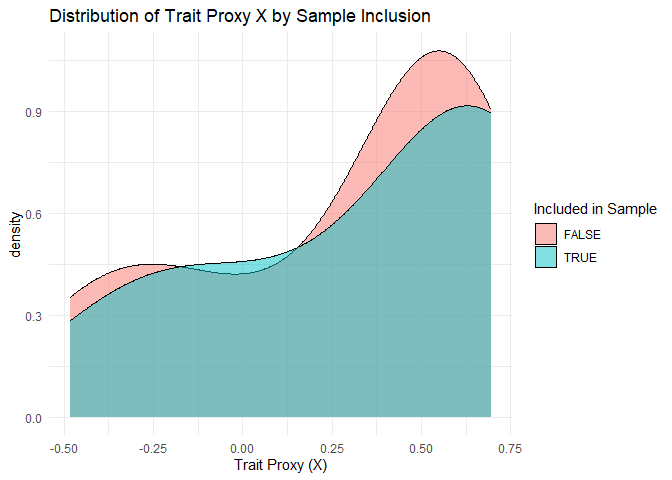

                         what     value
1 cor(inclusion, growth rate) 0.2190484
2           cor(inclusion, X) 0.0852794
3     sd(log growth) - sample 0.1526563
4       sd(log growth) - true 0.2478649

In [ ]:
# Create X = trait + epsilon (epsilon ~ N(0, 0.05))
growth_summary <- growth_summary %>%
  mutate(
    X = trait + rnorm(n(), mean = 0, sd = 0.05)
  )

# Split dataset to match analyst's access
# Only dataset == "all" has one row per species
growth_all_only <- growth_summary %>%
  filter(dataset == "all")

# The analyst only sees: 
# - log_growth_rate
# - X
# - inclusion status (but not the full population)
# So they might compare included vs. not-included X values to assess correlation

# 1. Analyst tries to assess whether inclusion depends on X
#    (proxy for trait that determines sampling bias)
cor_inclusion_X <- cor(growth_all_only$included_in_sample, growth_all_only$X)

# Compare the distribution of X for included vs. not
ggplot(growth_all_only, aes(x = X, fill = included_in_sample)) +
  geom_density(alpha = 0.5) +
  labs(title = "Distribution of Trait Proxy X by Sample Inclusion",
       x = "Trait Proxy (X)", fill = "Included in Sample") +
  theme_minimal()

## Assessing within-species error

The within-species data defect correlation and problem difficulty can be
assessed in the same way as their cross-species counterparts. We will
assume that data on ( z ) is available, but measured with random error,
and compare its sample and population distributions. I have simulated
the data in such a way that ( z ) is the only explanatory variable
affecting species’ occupancy probabilities in a given year, and every
species has a non-zero probability of being observed given that it
occupies a sampled site. These two simplifications make assessing the
within-species data defect correlations much simpler, because the set of
sampled sites does not differ between species, and we need only consider
( z ) rather than a larger set of explanatory variables. Hence, we can
simply compare the distribution of the measured proxy for ( z ) at the
set of sampled sites, which does not vary between species, with its
population distribution. Like the cross-species problem difficulty, we
can obtain lower bounds for the within-species problem difficulties
using their sample analogues. The within-species sampling fractions are
directly measurable from the available data.

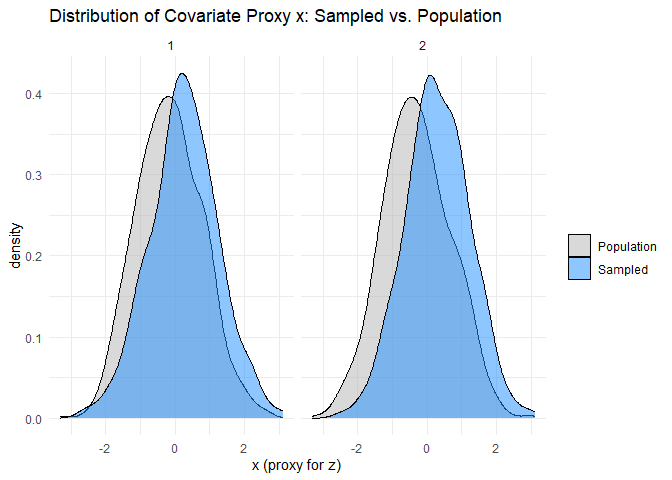

# A tibble: 40 × 3
   species  year      ddc
   <chr>   <dbl>    <dbl>
 1 sp1         1  0.211  
 2 sp1         2  0.0765 
 3 sp10        1  0.112  
 4 sp10        2  0.146  
 5 sp11        1  0.00366
 6 sp11        2  0.0104 
 7 sp12        1  0.150  
 8 sp12        2  0.121  
 9 sp13        1 -0.0530 
10 sp13        2 -0.0323 
# ℹ 30 more rows

# A tibble: 40 × 4
   species  year pop_sd sample_sd
   <chr>   <dbl>  <dbl>     <dbl>
 1 sp1         1  0.443     0.489
 2 sp1         2  0.396     0.420
 3 sp10        1  0.498     0.500
 4 sp10        2  0.497     0.483
 5 sp11        1  0.361     0.363
 6 sp11        2  0.325     0.330
 7 sp12        1  0.481     0.499
 8 sp12        2  0.428     0.458
 9 sp13        1  0.463     0.449
10 sp13        2  0.381     0.369
# ℹ 30 more rows

In [ ]:
rho <- 0.5
n <- n_sites

# Generate epsilon
epsilon_base <- rnorm(n)
epsilon_year2 <- rnorm(n)

# x = rho * z + sqrt(1 - rho^2) * epsilon
x_base <- rho * z_base + sqrt(1 - rho^2) * epsilon_base
x_year2 <- rho * z_year2 + sqrt(1 - rho^2) * epsilon_year2

# Add to site_year_df
site_year_df$x <- ifelse(site_year_df$year == 1, x_base[site_year_df$site], x_year2[site_year_df$site])

# Prepare data
plot_df <- site_year_df %>%
  mutate(sampled = ifelse(I == 1, "Sampled", "Population"))

# Faceted density plot: one panel per year
ggplot(plot_df, aes(x = x, fill = sampled)) +
  geom_density(alpha = 0.5) +
  facet_wrap(~year) +
  scale_fill_manual(values = c("grey70", "dodgerblue")) +
  labs(
    title = "Distribution of Covariate Proxy x: Sampled vs. Population",
    x = "x (proxy for z)",
    fill = ""
  ) +
  theme_minimal()